# Бойко Виктория Владимировна
Лабораторная работа № 3. «Решние линейных и нелинейных систем разными методами»

№ 3

In [217]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from sympy import *

1. Создать матрицу $3\times3$ из случайных целых чисел из отрезка [-8, 10]. Найти матрицу Гивенса которая зануляет элемент $a_{31}$. Найти QR разложение матрицы методом Гивенса. Проверить методом np.linalg

In [218]:
A1 = np.random.randint(-8, 11, size=(3,3))
print("Исходная матрица:\n", A1)

Исходная матрица:
 [[ 1 -5 -8]
 [-6  3  9]
 [ 5  3 10]]


In [219]:
a11, a31  = A1[0, 0], A1[2, 0]

norm = np.sqrt(a11**2 + a31**2)
c, s = a11 / norm, a31 / norm

G1 = np.eye(3)
G1[[0, 0, 2, 2], [0, 2, 0, 2]] = [c, s, -s, c]

print("\nМатрица Гивенса G:\n", G1.round(2))

A1_new = G1 @ A1
print("\nМатрица после умножения на G (G @ A):\n", A1_new.round(2))


Матрица Гивенса G:
 [[ 0.2   0.    0.98]
 [ 0.    1.    0.  ]
 [-0.98  0.    0.2 ]]

Матрица после умножения на G (G @ A):
 [[ 5.1   1.96  8.24]
 [-6.    3.    9.  ]
 [ 0.    5.49  9.81]]


In [220]:
def givens_rotation(a, b):
    r = np.sqrt(a**2 + b**2)
    return a / r, b / r

def qr_givens(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for j in range(n):
        for i in range(j+1, m):
            if R[i,j] != 0:
                c, s = givens_rotation(R[j,j], R[i,j])
                G = np.eye(m)
                G[[j,i], [j,i]] = c
                G[j,i] = s
                G[i,j] = -s

                R = G @ R
                Q = Q @ G.T

    return Q, R

In [221]:
Q1, R1 = qr_givens(A1)
print("Q:\n", Q1.round(2))
print("R:\n", R1.round(2))

Q1_np, R1_np = np.linalg.qr(A1)
print("\nQ (numpy):\n", Q1_np.round(2))
print("R (numpy):\n", R1_np.round(2))

Q:
 [[ 0.13 -0.75 -0.65]
 [-0.76  0.34 -0.55]
 [ 0.64  0.56 -0.53]]
R:
 [[ 7.87 -1.02 -1.52]
 [ 0.    6.48 14.73]
 [-0.   -0.   -5.06]]

Q (numpy):
 [[-0.13 -0.75  0.65]
 [ 0.76  0.34  0.55]
 [-0.64  0.56  0.53]]
R (numpy):
 [[-7.87  1.02  1.52]
 [ 0.    6.48 14.73]
 [ 0.    0.    5.06]]


2. Решить систему с помощью QR разложения матрицы А. QR разложение найти методом Гивенса Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом np.solve.
\begin{cases}
    5.7x_1 - 7.8x_2 - 5.6x_3 - 8.3x_4 = 2.7 \\
    6.6x_1 + 13.1x_2 - 6.3x_3 + 4.3x_4 = -5.5 \\    
    14.7x_1 - 2.8x_2 + 5.6x_3 - 12.1x_4 = 8.6 \\
    8.5x_1 + 12.7x_2 - 23.7x_3 + 5.7x_4 = 14.7
  \end{cases}

In [222]:
def backward_substitution(A, B):
    n = len(B)
    X = np.zeros(n)
    for i in range(n-1, -1, -1):
        X[i] = (B[i] - np.dot(A[i, i+1:], X[i+1:])) / A[i, i]
    return X


A2 = np.array([
    [5.7, -7.8, -5.6, -8.3],
    [6.6, 13.1, -6.3, 4.3],
    [14.7, -2.8, 5.6, -12.1],
    [8.5, 12.7, -23.7, 5.7]
])
b2 = np.array([2.7, -5.5, 8.6, 14.7])

In [223]:
Q2, R2 = qr_givens(A2.round(2))
print("Q:\n", Q2.round(2))
print("R:\n", R2.round(2))

QTb2 = Q2.T @ b2
X2 = backward_substitution(R2, QTb2)
print("\nРешение X:\n", X2.round(2))

x2_np = np.linalg.solve(A2, b2)
print("\nРешение numpy:\n", x2_np.round(2))

Q:
 [[ 0.3  -0.49 -0.57 -0.58]
 [ 0.35  0.58  0.34 -0.65]
 [ 0.77 -0.37  0.42  0.3 ]
 [ 0.45  0.53 -0.61  0.38]]
R:
 [[ 19.09   5.7  -10.09  -7.77]
 [  0.    19.21 -15.51  14.14]
 [  0.     0.    17.93  -2.37]
 [  0.     0.    -0.     0.59]]

Решение X:
 [ 11.95 -11.23   1.79  17.23]

Решение numpy:
 [ 11.95 -11.23   1.79  17.23]


3. Решить систему методом Зейделя с точностью до $10^{-3}$. Проверить выполнение достаточного условия сходимости. Если условие не выполняется, в программе выполнить эквивалентные преобразования системы, после этого привести к удобному для итераций виду. Оформить итерации в виде таблицы (можно пользоваться модулями PrettyTable или Pandas). Проверить полученное решение.
\begin{cases}
    1.21x_1 - 0.18x_2 + 1.75x_3 = 0.11 \\
    0.13x_1 + 1.75x_2 - 0.11x_3 = 2 \\    
    3.01x_1 - 0.33x_2 + 1.11x_3= 0.13
  \end{cases}

In [224]:
def seidel(A, b, tol=1e-3, max_iter=10000):
    n = len(b)
    x = np.zeros(n)
    iterations = []
    errors = []
    
    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        error = np.linalg.norm(x_new - x)
        iterations.append(np.append(x_new.round(4), error.round(5)))
        if error < tol:
            break
        x = x_new.copy()
    
    columns = [f'x_{i+1}' for i in range(n)] + ['Error']
    return pd.DataFrame(iterations, columns=columns)


A3 = np.array([
    [3.01, -0.33, 1.11],
    [0.13, 1.75, -0.11],
    [1.21, -0.18, 1.75],
])
b3 = np.array([0.13, 2, 0.11])

In [225]:
print("Проверка диагонального преобладания:")
for i in range(3):
    diag = abs(A3[i,i])
    sum_rest = sum(abs(A3[i,j]) for j in range(3) if j != i)
    print(f'Строка {i+1}: {diag} > {sum_rest.round(2)} -> {diag > sum_rest}')

Проверка диагонального преобладания:
Строка 1: 3.01 > 1.44 -> True
Строка 2: 1.75 > 0.24 -> True
Строка 3: 1.75 > 1.39 -> True


In [226]:
df3 = seidel(A3, b3, tol=1e-3)
print("Итерации:")
df3

Итерации:


,x_1,x_2,x_3,Error
0,0.0432,1.1396,0.1502,1.15032
1,0.1127,1.1439,0.1026,0.08441
2,0.1308,1.1396,0.0896,0.02261
3,0.1351,1.1385,0.0866,0.00540
4,0.1361,1.1382,0.0858,0.00128
5,0.1363,1.1381,0.0857,0.00030


In [227]:
x3 = df3.iloc[-1].values
print("\nПроверка A3 @ x3 = b3: ", np.allclose(A3 @ x3, b3, atol=1e-3))

A_a = np.array([
    [1.21, -0.18, 1.75],
    [0.13, 1.75, -0.11],
    [3.01, -0.33, 1.11],

])
print(x3)
print(np.linalg.solve(A3, b3))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

4. Решить нелинейное уравнение методом хорд с точностью $10^{-4}$ и методом Ньютона (касательных) с точностью $10^{-5}$. До решения отделить корни графическим методом, проверить выполнение условий метода.

\begin{array}{cccc}
\hline
№Варианта & Функция & a & b \\
\hline
3 & x^3 + 2.84x^2 - 5.606x - 14.766 & -4 & 3 \\
\hline
\end{array}

Метод хорд (закреплена точка $(b)$):
$$
x_n = x_{n-1} - \frac{f(x_{n-1}) \cdot (x_{n-1} - b)}{f(x_{n-1}) - f(b)}
$$


 Метод Ньютона:
$$
x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}
$$


Условие остановки:
$$
|x_n - x_{n-1}| < \varepsilon
$$

In [ ]:
def f(x):
    return x**3 + 2.84*x**2 - 5.606*x - 14.766

def df(x):
    return 3*x**2 + 2*2.84*x - 5.606

def ddf(x):
    return 6*x + 2*2.84



def chord_method(a, b, epsilon):
    x_prev = a
    iteration = 0
    results = []

    while True:
        x_next = x_prev - (f(x_prev) * (x_prev - b)) / (f(x_prev) - f(b))
        iteration += 1
        results.append([iteration, x_next, abs(x_next - x_prev)])
        if abs(x_next - x_prev) < epsilon:
            break
        x_prev = x_next

    df_chord = pd.DataFrame(results, columns=['Iteration', 'Root', 'Error'])
    print("Метод хорд (закреплена точка b):")
    print(df_chord)
    return x_next


def newton_method(x0, epsilon):
    x_curr = x0
    iteration = 0
    results = []

    while True:
        x_next = x_curr - f(x_curr) / df(x_curr)
        iteration += 1
        results.append([iteration, x_next, abs(x_next - x_curr)])
        if abs(x_next - x_curr) < epsilon:
            break
        x_curr = x_next

    df_newton = pd.DataFrame(results, columns=['Iteration', 'Root', 'Error'])
    print("\nМетод Ньютона:")
    print(df_newton)
    return x_next

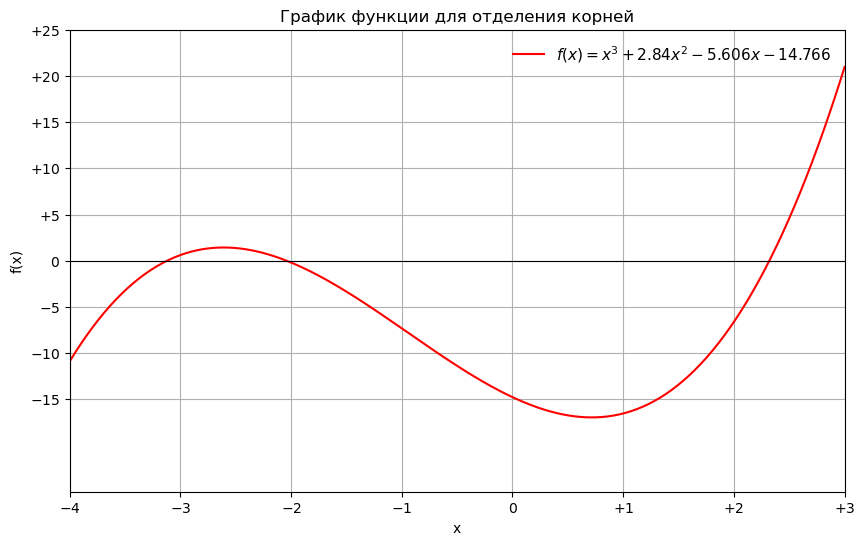

Метод хорд (закреплена точка b):
   Iteration      Root     Error
0          1  2.239835  0.239835
1          2  2.301068  0.061233
2          3  2.315564  0.014497
3          4  2.318933  0.003369
4          5  2.319712  0.000779
5          6  2.319893  0.000180
6          7  2.319934  0.000042

Метод Ньютона:
   Iteration      Root         Error
0          1  2.454233  5.457668e-01
1          2  2.326823  1.274102e-01
2          3  2.319966  6.856912e-03
3          4  2.319947  1.945385e-05
4          5  2.319947  1.563718e-10

Приближенный корень, найденный методом хорд: 2.319934199782605
Приближенный корень, найденный методом Ньютона: 2.3199467077663094


In [ ]:
X = np.linspace(-4, 3, 400)
Y = f(X)

plt.figure(figsize=(10, 6))
plt.plot(X, Y, color="red", linewidth=1.5, linestyle="-", label=r"$f(x) = x^3 + 2.84x^2 - 5.606x - 14.766$")
plt.plot(X, np.zeros(len(X)), color="black", linewidth=0.8)


plt.xlim(X.min(), X.max())
plt.xticks([-4,-3,-2,-1,0,+1,+2,+3], [r'$-4$',r'$-3$',r'$-2$', r'$-1$',r'$0$', r'$+1$', r'$+2$', r'$+3$'])


plt.ylim(-25, 25)
plt.yticks(np.arange(-15, 26, 5), [r'$-15$',r'$-10$', r'$-5$', r'$0$', r'$+5$', r'$+10$', r'$+15$', r'$+20$', r'$+25$'])

plt.legend(loc='best', frameon=False, fontsize=11)
plt.grid(True)
plt.title("График функции для отделения корней")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Применение методов
a = -4
b = 3
epsilon_chord = 1e-4
epsilon_newton = 1e-5


root_chord = chord_method(2, 3, epsilon_chord)
root_newton = newton_method(3, epsilon_newton)

print(f"\nПриближенный корень, найденный методом хорд: {root_chord}")
print(f"Приближенный корень, найденный методом Ньютона: {root_newton}")

5. Решить систему нелинейных уравнений методом Ньютона с точностью $10^{-4}$
\begin{cases}
    \sin(x+0.5)-y=1\\
    x+\cos(y-2)=0
  \end{cases}

In [ ]:
def f1(x, y):
    return np.sin(x + 0.5) - y - 1

def f2(x, y):
    return x + np.cos(y - 2)


def jacobian(x_val, y_val):
    return np.array([
        [df1_dx(x_val, y_val), df1_dy(x_val, y_val)],
        [df2_dx(x_val, y_val), df2_dy(x_val, y_val)]
    ])


def F_vector(x_val, y_val):
    return np.array([f1(x_val, y_val), f2(x_val, y_val)])


def cramer(A, b):
    det_A = np.linalg.det(A)
    if det_A == 0:
        raise ValueError("Матрица A вырожденная, метод Крамера не применим.")
    
    n = len(b)
    x = np.zeros(n)
    
    for i in range(n):
        A_i = A.copy()
        A_i[:, i] = b
        x[i] = np.linalg.det(A_i) / det_A
        
    return x


def newton_iteration(x0, y0, epsilon, max_iterations=100):
    x_curr = x0
    y_curr = y0
    iteration = 0
    results = []

    while True:
        iteration += 1
        J = jacobian(x_curr, y_curr)
        F = F_vector(x_curr, y_curr)
        delta = cramer(J, -F)  #здесь используем метод Крамера

        x_next = x_curr + delta[0]
        y_next = y_curr + delta[1]
        
        results.append([iteration, x_next, y_next, delta[0], delta[1]])
        
        if max(abs(delta)) < epsilon:
            break
        
        x_curr = x_next
        y_curr = y_next
        
        if iteration > max_iterations:
            print("Достигнуто максимальное количество итераций.")
            break

    df = pd.DataFrame(results, columns=['Iteration', 'x', 'y', 'Delta x', 'Delta y'])
    print("\nИтерационная система (метод Ньютона):")
    print(df)
    return x_next, y_next, iteration

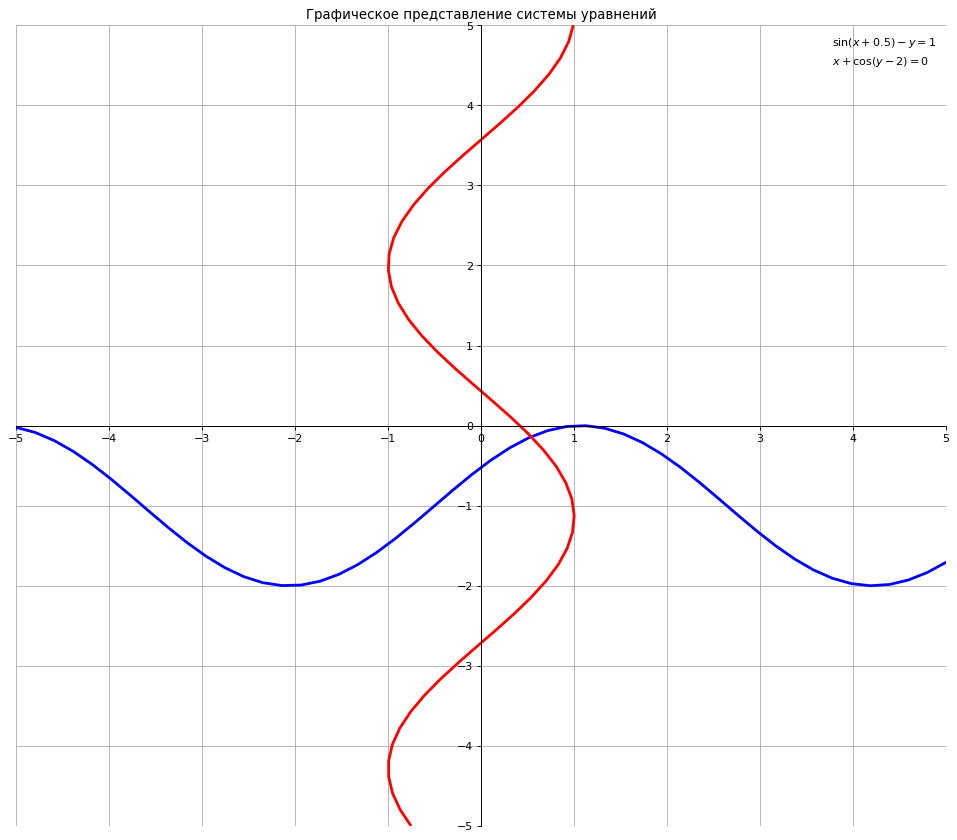

In [ ]:
x, y = symbols('x y')

# a. Построение графиков функций
x_range = np.linspace(-5, 5)
y_range = np.linspace(-5, 5)
X, Y = np.meshgrid(x_range, y_range)

plt.figure(figsize=(15, 13), dpi=80)
ax = plt.subplot(111)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

Z1 = f1(X, Y)
Z2 = f2(X, Y)

contour1 = ax.contour(X, Y, Z1, [0], colors='blue', linewidths=2.5, linestyles='-')
contour2 = ax.contour(X, Y, Z2, [0], colors='red', linewidths=2.5, linestyles='-')

contour1.collections[0].set_label(r'$\sin(x+0.5) - y = 1$')
contour2.collections[0].set_label(r'$x + \cos(y-2) = 0$')

ax.plot(x_range, np.zeros(len(x_range)), color='black', linewidth=0.5)
ax.plot(np.zeros(len(y_range)), y_range, color='black', linewidth=0.5)

ax.set_title('Графическое представление системы уравнений')
ax.grid(True)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-5, 6, 1))

ax.legend(loc='upper right', frameon=False)
plt.show()

In [ ]:
# b. Определение начального приближения
initial_guess = np.array([0.0, -1.0])
print(f"Начальное приближение: x = {initial_guess[0]}, y = {initial_guess[1]}")

# c. Вычисление производных и матрицы Якоби
f1_sym = sin(x + 0.5) - y - 1
f2_sym = x + cos(y - 2)

df1_dx_sym = f1_sym.diff(x)
df1_dy_sym = f1_sym.diff(y)
df2_dx_sym = f2_sym.diff(x)
df2_dy_sym = f2_sym.diff(y)

df1_dx = lambdify((x, y), df1_dx_sym)
df1_dy = lambdify((x, y), df1_dy_sym)
df2_dx = lambdify((x, y), df2_dx_sym)
df2_dy = lambdify((x, y), df2_dy_sym)

J = jacobian(initial_guess[0], initial_guess[1])
print("\nМатрица Якоби:")
print(J)

# d. Составление системы линейных уравнений относительно приращений x и y
F = F_vector(initial_guess[0], initial_guess[1])

print("\nВектор F:")
print(F)

# e. Решение линейной системы методом Крамера
delta = cramer(J, -F)

print("\nРешение линейной системы (приращения dx, dy) методом Крамера:")
print(delta)

# g, h. Стоп по условию и вывод количества итераций
epsilon = 1e-4
x_solution, y_solution, iterations = newton_iteration(initial_guess[0], initial_guess[1], epsilon)

print(f"\nРешение системы уравнений методом Ньютона: x = {x_solution}, y = {y_solution}")
print(f"Количество итераций: {iterations}")

# i. Проверка полученных решений подстановкой и сравнение с решениями функцией Питон
x_scipy, y_scipy = sp.optimize.fsolve(lambda z: [np.sin(z[0] + 0.5) - z[1] - 1, z[0] + np.cos(z[1] - 2)], initial_guess)

print("\nРешение системы уравнений с использованием fsolve:")
print(f"x = {x_scipy}, y = {y_scipy}")

Начальное приближение: x = 0.0, y = -1.0

Матрица Якоби:
[[ 0.87758256 -1.        ]
 [ 1.          0.14112001]]

Вектор F:
[ 0.47942554 -0.9899925 ]

Решение линейной системы (приращения dx, dy) методом Крамера:
[0.82069716 1.19965506]

Итерационная система (метод Ньютона):
   Iteration         x         y       Delta x       Delta y
0          1  0.820697  0.199655  8.206972e-01  1.199655e+00
1          2  0.523805 -0.104593 -2.968919e-01 -3.042479e-01
2          3  0.538011 -0.138518  1.420562e-02 -3.392511e-02
3          4  0.537853 -0.138685 -1.578864e-04 -1.666209e-04
4          5  0.537853 -0.138685  1.110547e-09 -1.017192e-08

Решение системы уравнений методом Ньютона: x = 0.5378529959431572, y = -0.13868461654748762
Количество итераций: 5

Решение системы уравнений с использованием fsolve:
x = 0.5378529959432937, y = -0.1386846165474925
